In [2]:
import numpy as np
import pandas as pd
import sklearn
# from microlearn.offloader import Offload
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns

Read dataset

In [3]:
dataset = pd.read_csv('dataset2.csv', sep=',',header=0)
dataset

,Suhu,Kelembaban,Curah Hujan,Hasil Prediksi
0,24.5,80,0.0,"ulat_daun=rendah,ulat_krop=rendah,busuk_hitam=..."
1,24.8,84,45.5,"ulat_daun=tinggi,ulat_krop=tinggi,busuk_hitam=..."
2,24.8,83,9.8,"ulat_daun=tinggi,ulat_krop=tinggi,busuk_hitam=..."
3,24.3,81,0.6,"ulat_daun=rendah,ulat_krop=rendah,busuk_hitam=..."
4,24.1,86,23.0,"ulat_daun=tinggi,ulat_krop=tinggi,busuk_hitam=..."
5,23.9,85,2.7,"ulat_daun=rendah,ulat_krop=rendah,busuk_hitam=..."
6,23.2,86,12.2,"ulat_daun=tinggi,ulat_krop=tinggi,busuk_hitam=..."
7,23.5,84,5.2,"ulat_daun=tinggi,ulat_krop=tinggi,busuk_hitam=..."
8,23.5,85,0.8,"ulat_daun=rendah,ulat_krop=rendah,busuk_hitam=..."
9,22.8,91,27.2,"ulat_daun=tinggi,ulat_krop=tinggi,busuk_hitam=..."


Preprocessing Data

In [4]:
ulat_daun = dataset.drop(columns=['Hasil Prediksi'])
ulat_krop = dataset.drop(columns=['Hasil Prediksi'])
busuk_hitam = dataset.drop(columns=['Hasil Prediksi'])

In [5]:
ulat_daun['ulat_daun'] = dataset['Hasil Prediksi'].str.split(pat=',').str[0]
ulat_krop['ulat_krop'] = dataset['Hasil Prediksi'].str.split(pat=',').str[1]
busuk_hitam['busuk_hitam'] = dataset['Hasil Prediksi'].str.split(pat=',').str[2]

In [6]:
ulat_daun['ulat_daun'] = np.where(ulat_daun['ulat_daun'] == 'ulat_daun=rendah', 0, 1)
ulat_krop['ulat_krop'] = np.where(ulat_krop['ulat_krop'] == 'ulat_krop=rendah', 0, 1)
busuk_hitam['busuk_hitam'] = np.where(busuk_hitam['busuk_hitam'] == 'busuk_hitam=rendah', 0, 1)

In [6]:
ulat_daun

,Suhu,Kelembaban,Curah Hujan,ulat_daun
0,24.5,80,0.0,0
1,24.8,84,45.5,1
2,24.8,83,9.8,1
3,24.3,81,0.6,0
4,24.1,86,23.0,1
5,23.9,85,2.7,0
6,23.2,86,12.2,1
7,23.5,84,5.2,1
8,23.5,85,0.8,0
9,22.8,91,27.2,1


In [7]:
ulat_krop

,Suhu,Kelembaban,Curah Hujan,ulat_krop
0,24.5,80,0.0,0
1,24.8,84,45.5,1
2,24.8,83,9.8,1
3,24.3,81,0.6,0
4,24.1,86,23.0,1
5,23.9,85,2.7,0
6,23.2,86,12.2,1
7,23.5,84,5.2,1
8,23.5,85,0.8,0
9,22.8,91,27.2,1


In [8]:
busuk_hitam

,Suhu,Kelembaban,Curah Hujan,busuk_hitam
0,24.5,80,0.0,0
1,24.8,84,45.5,1
2,24.8,83,9.8,1
3,24.3,81,0.6,0
4,24.1,86,23.0,1
5,23.9,85,2.7,0
6,23.2,86,12.2,1
7,23.5,84,5.2,1
8,23.5,85,0.8,0
9,22.8,91,27.2,1


In [9]:
y_ulat_daun = ulat_daun['ulat_daun']
y_ulat_krop = ulat_krop['ulat_krop']
y_busuk_hitam = busuk_hitam['busuk_hitam']

X_ulat_daun = ulat_daun.drop(columns=['ulat_daun'])
X_ulat_krop = ulat_krop.drop(columns=['ulat_krop'])
X_busuk_hitam = busuk_hitam.drop(columns=['busuk_hitam'])


In [55]:
# dataset.columns = dataset.columns.to_series().apply(lambda x: x.strip())

Visalize Dataset

In [9]:
plt.style.use('_mpl-gallery')

d:\Kuliah\Lomba\Agrapana\Agrapana\electronic\naive baiyes\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Kuliah\Lomba\Agrapana\Agrapana\electronic\naive baiyes\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Kuliah\Lomba\Agrapana\Agrapana\electronic\naive baiyes\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Ulat Daun Classes')

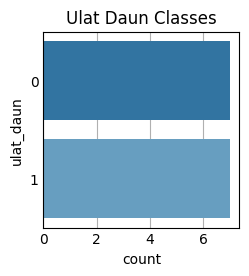

In [15]:
# Check y is distributed normally

sns.countplot(y=y_ulat_daun)
plt.title('Ulat Daun Classes')

d:\Kuliah\Lomba\Agrapana\Agrapana\electronic\naive baiyes\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Kuliah\Lomba\Agrapana\Agrapana\electronic\naive baiyes\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Kuliah\Lomba\Agrapana\Agrapana\electronic\naive baiyes\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Ulat Krop Classes')

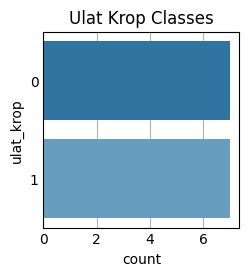

In [17]:
sns.countplot(y=y_ulat_krop)
plt.title('Ulat Krop Classes')

d:\Kuliah\Lomba\Agrapana\Agrapana\electronic\naive baiyes\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Kuliah\Lomba\Agrapana\Agrapana\electronic\naive baiyes\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Kuliah\Lomba\Agrapana\Agrapana\electronic\naive baiyes\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Busuk Hitam Classes')

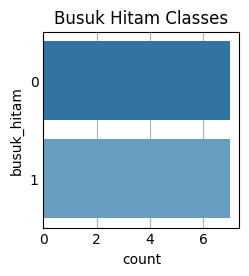

In [18]:
sns.countplot(y=y_busuk_hitam)
plt.title('Busuk Hitam Classes')

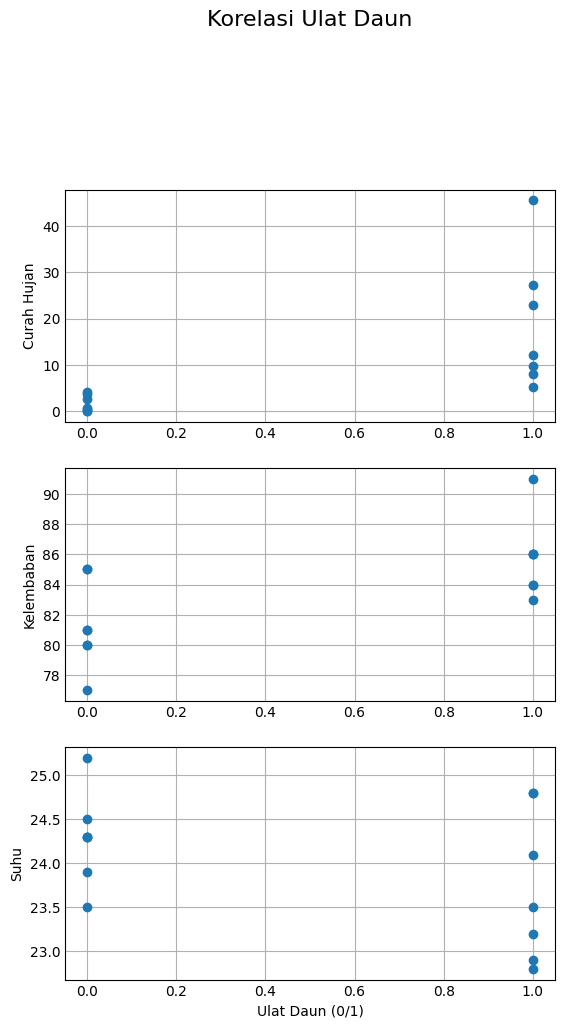

In [10]:
fig, ax = plt.subplots(3, figsize=(5,10))
fig.suptitle('Korelasi Ulat Daun', fontsize=16)
fig.subplots_adjust(top=0.8)

ax[0].scatter(y=ulat_daun['Curah Hujan'], x=ulat_daun['ulat_daun'])
ax[0].set_ylabel('Curah Hujan')

ax[1].scatter(y=ulat_daun['Kelembaban'], x=ulat_daun['ulat_daun'])
ax[1].set_ylabel('Kelembaban')

ax[2].scatter(y=ulat_daun['Suhu'], x=ulat_daun['ulat_daun'])
ax[2].set_xlabel('Ulat Daun (0/1)')
ax[2].set_ylabel('Suhu')

plt.show()

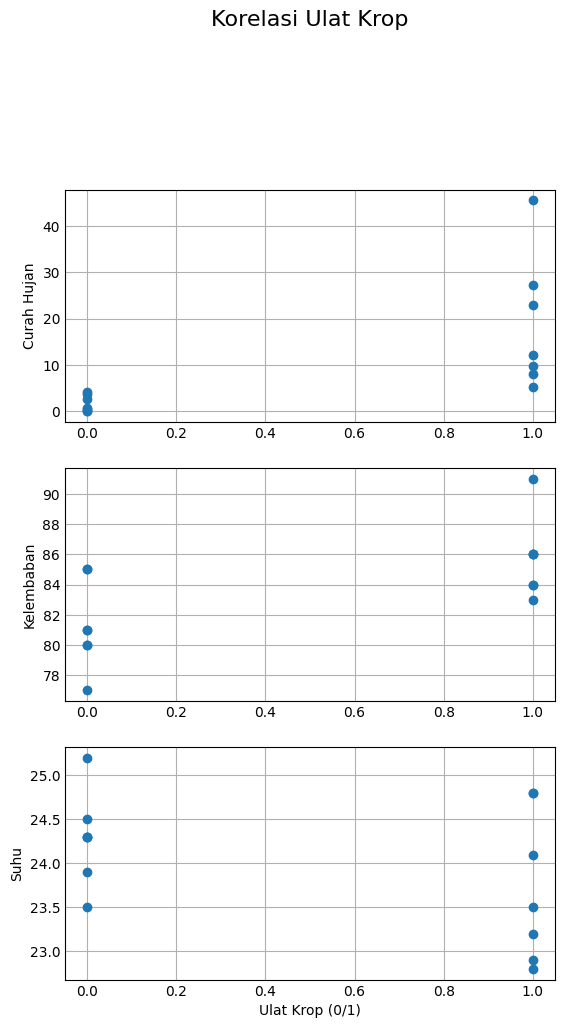

In [11]:
fig, ax = plt.subplots(3, figsize=(5,10))
fig.suptitle('Korelasi Ulat Krop', fontsize=16)
fig.subplots_adjust(top=0.8)

ax[0].scatter(y=ulat_krop['Curah Hujan'], x=ulat_krop['ulat_krop'])
ax[0].set_ylabel('Curah Hujan')

ax[1].scatter(y=ulat_krop['Kelembaban'], x=ulat_krop['ulat_krop'])
ax[1].set_ylabel('Kelembaban')

ax[2].scatter(y=ulat_krop['Suhu'], x=ulat_krop['ulat_krop'])
ax[2].set_xlabel('Ulat Krop (0/1)')
ax[2].set_ylabel('Suhu')

plt.show()

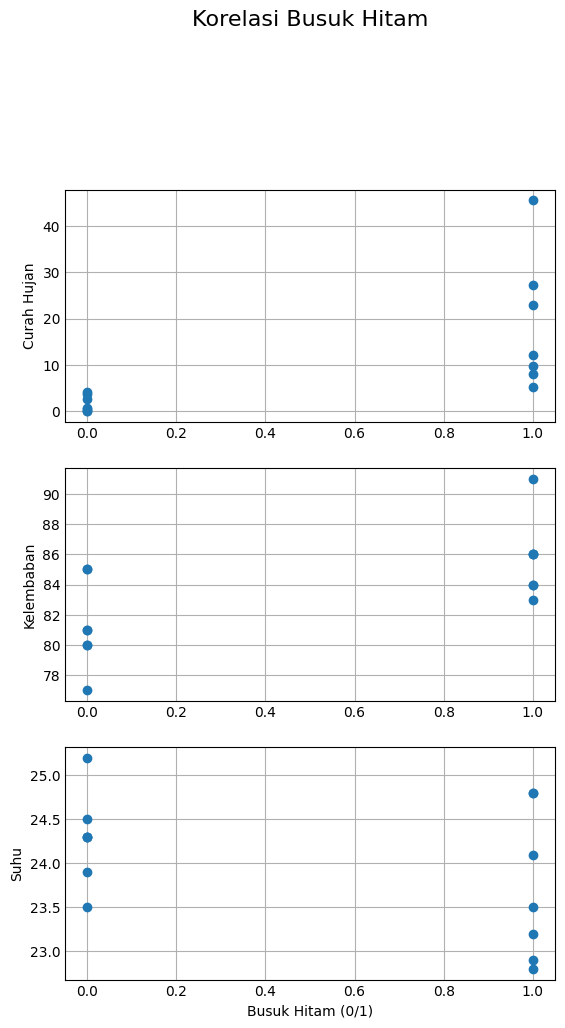

In [12]:
fig, ax = plt.subplots(3, figsize=(5,10))
fig.suptitle('Korelasi Busuk Hitam', fontsize=16)
fig.subplots_adjust(top=0.8)

ax[0].scatter(y=busuk_hitam['Curah Hujan'], x=busuk_hitam['busuk_hitam'])
ax[0].set_ylabel('Curah Hujan')

ax[1].scatter(y=busuk_hitam['Kelembaban'], x=busuk_hitam['busuk_hitam'])
ax[1].set_ylabel('Kelembaban')

ax[2].scatter(y=busuk_hitam['Suhu'], x=busuk_hitam['busuk_hitam'])
ax[2].set_xlabel('Busuk Hitam (0/1)')
ax[2].set_ylabel('Suhu')

plt.show()

Preprocessing Data to Model

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
# Scaling data
scaler = StandardScaler()

X_s_ud = scaler.fit_transform(X_ulat_daun)
X_s_uk = scaler.transform(X_ulat_krop)
X_s_bh = scaler.transform(X_busuk_hitam)

In [18]:
# Split test and train data

X_train_ud, X_test_ud, y_train_ud, y_test_ud = train_test_split(X_s_ud, y_ulat_daun, test_size=0.1, random_state=0)
X_train_uk, X_test_uk, y_train_uk, y_test_uk = train_test_split(X_s_uk, y_ulat_krop, test_size=0.1, random_state=0)
X_train_bh, X_test_bh, y_train_bh, y_test_bh = train_test_split(X_s_bh, y_busuk_hitam, test_size=0.1, random_state=0)

In [19]:
# Define Model
from sklearn.naive_bayes import GaussianNB

model_ud = GaussianNB()
model_uk = GaussianNB()
model_bh = GaussianNB()

In [20]:
print(y_train_ud)

4     1
11    0
2     1
13    0
9     1
1     1
7     1
10    1
3     0
0     0
5     0
12    0
Name: ulat_daun, dtype: int32


In [21]:
# Train Model
model_ud.fit(X_train_ud, y_train_ud)
model_uk.fit(X_train_uk, y_train_uk)
model_bh.fit(X_train_bh, y_train_bh)

GaussianNB()

In [22]:
# Metrics
from sklearn.metrics import (accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score)

y_pred_ud = model_ud.predict(X_test_ud)
y_pred_uk = model_ud.predict(X_test_uk)
y_pred_bh = model_ud.predict(X_test_bh)

# Accuracy
ud_accuracy = accuracy_score(y_pred_ud, y_test_ud)
uk_accuracy = accuracy_score(y_pred_uk, y_test_uk)
bh_accuracy = accuracy_score(y_pred_bh, y_test_bh)

print(f"Akurasi Model Ulat Daun: {ud_accuracy}")
print(f"Akurasi Model Ulat Krop: {uk_accuracy}")
print(f"Akurasi Model Busuk Hitam: {bh_accuracy}")

Akurasi Model Ulat Daun: 0.5
Akurasi Model Ulat Krop: 0.5
Akurasi Model Busuk Hitam: 0.5


In [29]:
print(y_test_ud)

8    0
6    1
Name: ulat_daun, dtype: int32


In [28]:
print(y_pred_ud)

[1 1]


In [24]:
# Confusion Matrix
labels = [0,1]
ud_cm = confusion_matrix(y_pred_ud, y_test_ud, labels=labels)
uk_cm = confusion_matrix(y_pred_uk, y_test_uk, labels=labels)
bh_cm = confusion_matrix(y_pred_bh, y_test_bh, labels=labels)

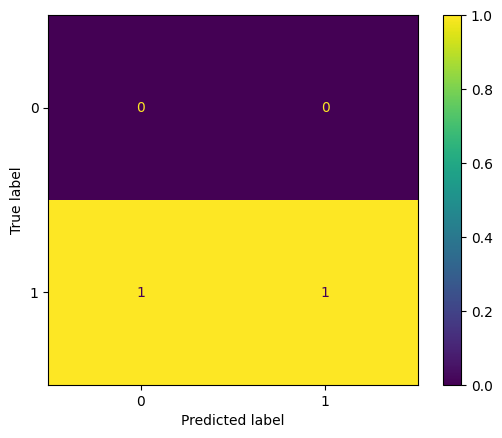

In [25]:
# Ulat Daun
disp = ConfusionMatrixDisplay(confusion_matrix=ud_cm,display_labels=labels)
disp.plot()

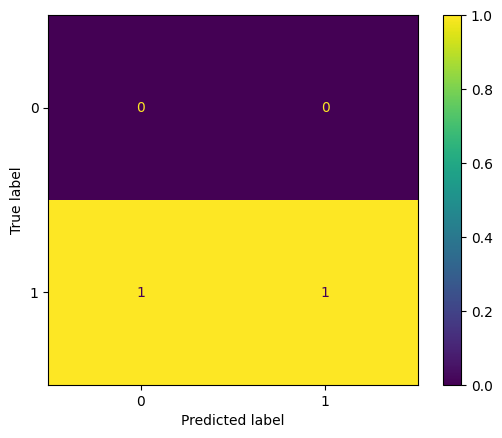

In [26]:
# Ulat Krop
disp = ConfusionMatrixDisplay(confusion_matrix=uk_cm,display_labels=labels)
disp.plot()

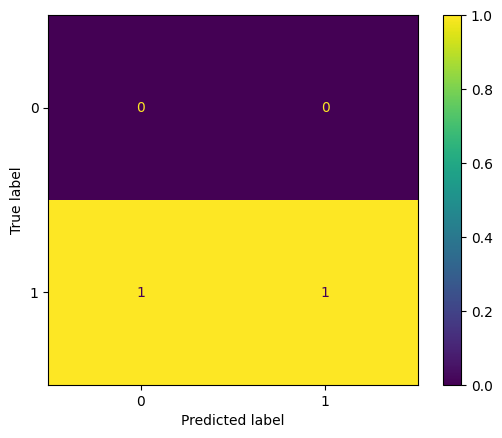

In [27]:
# Busuk Hitam
disp = ConfusionMatrixDisplay(confusion_matrix=bh_cm,display_labels=labels)
disp.plot()

In [56]:
X = dataset.loc[:, ['Suhu','Kelembaban', 'Curah Hujan']].to_numpy()
Y = dataset.loc[:, ['Hasil Prediksi']].to_numpy()
Y = Y.flatten()

In [57]:
print(X)

[[24.5 80.   0. ]
 [24.8 84.  45.5]
 [24.8 83.   9.8]
 [24.3 81.   0.6]
 [24.1 86.  23. ]
 [23.9 85.   2.7]
 [23.2 86.  12.2]
 [23.5 84.   5.2]
 [23.5 85.   0.8]
 [22.8 91.  27.2]
 [22.9 86.   8. ]
 [24.3 80.   4.2]
 [24.3 81.   3.7]
 [25.2 77.   0. ]]


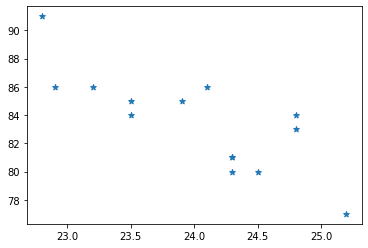

In [58]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], marker="*");

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])
print(X)

[[24.5  1.   0. ]
 [24.8  4.  45.5]
 [24.8  3.   9.8]
 [24.3  2.   0.6]
 [24.1  6.  23. ]
 [23.9  5.   2.7]
 [23.2  6.  12.2]
 [23.5  4.   5.2]
 [23.5  5.   0.8]
 [22.8  7.  27.2]
 [22.9  6.   8. ]
 [24.3  1.   4.2]
 [24.3  2.   3.7]
 [25.2  0.   0. ]]


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [63]:
print(X_train)

[[24.3  1.   4.2]
 [24.8  3.   9.8]
 [25.2  0.   0. ]
 [22.8  7.  27.2]
 [24.8  4.  45.5]
 [23.5  4.   5.2]
 [22.9  6.   8. ]
 [24.3  2.   0.6]
 [24.5  1.   0. ]
 [23.9  5.   2.7]
 [24.3  2.   3.7]]


In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
sc = StandardScaler()

In [66]:
X_train = sc.fit_transform(X_train)

In [67]:
X_test = sc.fit_transform(X_test)

In [68]:
from sklearn.naive_bayes import GaussianNB

In [69]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [70]:
from sklearn.metrics import (accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score)

In [71]:
y_pred = classifier.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.6666666666666666
F1 Score: 0.8000000000000002


In [73]:
off = Offload(classifier)
off.export_to_arduino('D:\qda_offload6.ino')